<a href="https://colab.research.google.com/github/Heoyuna0819/deeplearning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0022
Epoch 2/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.4724e-04
Epoch 3/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.9192e-04
Epoch 4/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.6188e-04
Epoch 5/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.6655e-04
Epoch 6/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.4376e-04
Epoch 7/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.1765e-04
Epoch 8/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.3260e-04
Epoch 9/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2192e-04
Epoch 10/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.2997e-04
Epoch 11/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.1798e-04
Epoch 12/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.1773e-04
Epoch 13/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4444e-04
Epoch 14/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.3113e-0

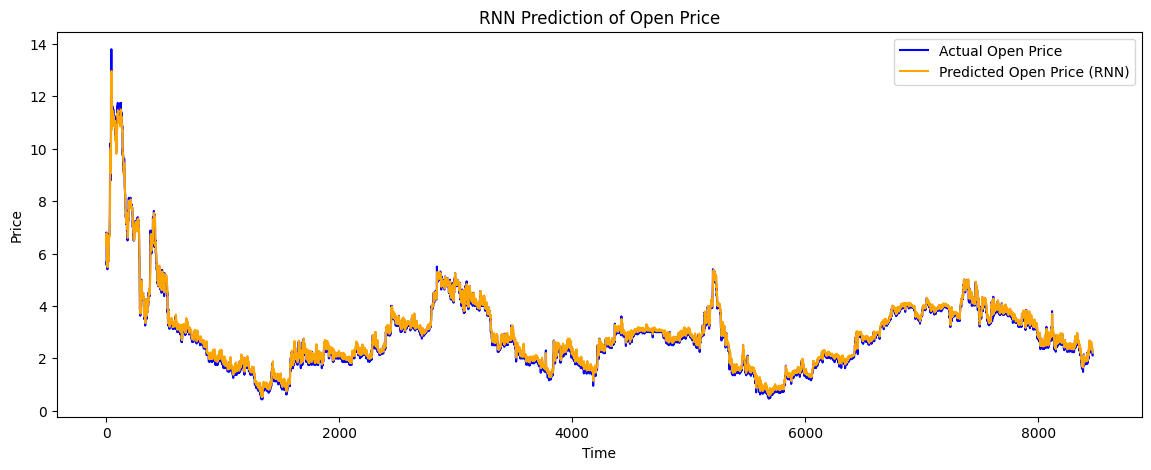

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/AAME.csv")

# 날짜 정렬
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 0이 아닌 Open 값만 사용
df = df[df['Open'] != 0]

# Open 값만 추출
data = df[['Open']].values

# 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 시계열 데이터 구성 (60일로 다음 날 예측)
X, y = [], []
seq_len = 60
for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i-seq_len:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# RNN 입력에 맞게 reshape
X = X.reshape((X.shape[0], X.shape[1], 1))

# RNN 모델 구성
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 학습
model.fit(X, y, epochs=20, batch_size=32)

# 예측
predicted = model.predict(X)
predicted_price = scaler.inverse_transform(predicted)
real_price = scaler.inverse_transform(y.reshape(-1, 1))

# 시각화
plt.figure(figsize=(14,5))
plt.plot(real_price, label='Actual Open Price', color='blue')
plt.plot(predicted_price, label='Predicted Open Price (RNN)', color='orange')
plt.title('RNN Prediction of Open Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
